In [42]:
# Import the data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder



In [43]:
# Load the dataset into a pandas DataFrame

Real_Estate_data_df = pd.read_csv('USA Real Estate Dataset new.csv')


In [44]:
# Display the basic information of the dataframe
print(Real_Estate_data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40111 entries, 0 to 40110
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brokered_by     40093 non-null  float64
 1   status          40111 non-null  object 
 2   price           40053 non-null  float64
 3   bed             28761 non-null  float64
 4   bath            27158 non-null  float64
 5   acre_lot        36224 non-null  float64
 6   street          40004 non-null  float64
 7   city            40094 non-null  object 
 8   state           40111 non-null  object 
 9   zip_code        40111 non-null  int64  
 10  house_size      28903 non-null  float64
 11  prev_sold_date  15316 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 3.7+ MB
None


In [45]:
# summary statistics
print(Real_Estate_data_df.describe())

         brokered_by         price           bed          bath      acre_lot  \
count   40093.000000  4.005300e+04  28761.000000  27158.000000  36224.000000   
mean    52715.409997  4.856361e+05      3.476931      2.678548     11.630184   
std     29786.509676  8.704503e+05      1.337864      1.212267    106.481943   
min        51.000000  0.000000e+00      1.000000      1.000000      0.000000   
25%     26918.000000  1.800000e+05      3.000000      2.000000      0.170000   
50%     52410.000000  3.400000e+05      3.000000      2.000000      0.340000   
75%     78031.000000  5.199000e+05      4.000000      3.000000      2.010000   
max    110142.000000  3.468000e+07     99.000000     25.000000   7085.560000   

             street      zip_code    house_size  
count  4.000400e+04  40111.000000  28903.000000  
mean   1.060828e+06  75815.313355   2314.157354  
std    6.059690e+05    772.033707   1379.643195  
min    2.300000e+01  11111.000000    100.000000  
25%    5.323715e+05  75206.00

In [46]:
# checking for no values
print(Real_Estate_data_df.isnull().sum())

brokered_by          18
status                0
price                58
bed               11350
bath              12953
acre_lot           3887
street              107
city                 17
state                 0
zip_code              0
house_size        11208
prev_sold_date    24795
dtype: int64


In [47]:
# Checking for duplicates
print(Real_Estate_data_df.duplicated().sum())

0


In [48]:
# dropping missing values
Real_Estate_data_clean_df = Real_Estate_data_df.dropna()

In [49]:
# Verifying changes
Real_Estate_data_clean_df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
18,22959.0,for_sale,349000.0,6.0,5.0,4.41,307395.0,Newton,Texas,75966,5888.0,2014-06-17
19,106174.0,for_sale,249500.0,2.0,2.0,1.19,363547.0,Hemphill,Texas,75948,1872.0,2022-04-28
23,4317.0,for_sale,479000.0,5.0,4.0,6.28,840246.0,Newton,Texas,75966,4248.0,2022-05-06
27,100789.0,for_sale,179900.0,3.0,2.0,2.23,439804.0,Burkeville,Texas,75932,1240.0,2022-01-28
28,30107.0,for_sale,134900.0,4.0,2.0,0.29,1463813.0,Newton,Texas,75966,2010.0,2021-07-29


In [50]:
# Listing the data types
Real_Estate_data_clean_df.dtypes

brokered_by       float64
status             object
price             float64
bed               float64
bath              float64
acre_lot          float64
street            float64
city               object
state              object
zip_code            int64
house_size        float64
prev_sold_date     object
dtype: object

In [51]:
# Check the value_counts of the target column
Real_Estate_data_clean_df.value_counts

<bound method DataFrame.value_counts of        brokered_by    status     price  bed  bath  acre_lot     street  \
18         22959.0  for_sale  349000.0  6.0   5.0      4.41   307395.0   
19        106174.0  for_sale  249500.0  2.0   2.0      1.19   363547.0   
23          4317.0  for_sale  479000.0  5.0   4.0      6.28   840246.0   
27        100789.0  for_sale  179900.0  3.0   2.0      2.23   439804.0   
28         30107.0  for_sale  134900.0  4.0   2.0      0.29  1463813.0   
...            ...       ...       ...  ...   ...       ...        ...   
40082      81759.0  for_sale  325000.0  4.0   3.0      0.30  1198000.0   
40083      92851.0  for_sale  305900.0  4.0   3.0      0.18   771508.0   
40084     109440.0  for_sale  380000.0  4.0   3.0      0.38   665554.0   
40086      70650.0  for_sale  303000.0  4.0   2.0      0.24   443392.0   
40087      92851.0  for_sale  269000.0  4.0   2.0      0.19   760137.0   

                 city  state  zip_code  house_size prev_sold_date  
18 

### Value Trends Over Time by Zipcode ###

Analyze average home values by date and zipcode to track relative growth rates. Identify neighborhoods with the highest potential for long-term value appreciation, comparing current values against projected growth trends.


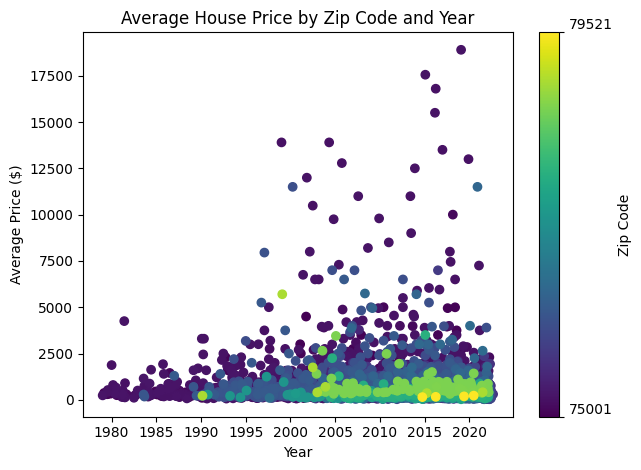

In [222]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Assuming Real_Estate_data_clean_df is already defined and cleaned
russells_data = Real_Estate_data_clean_df.copy()

# Drop all entries missing price or zip code
russells_data = russells_data.dropna(subset=['price', 'zip_code'])

# Convert prev_sold_date to datetime and format it to display only month and year
russells_data['Month'] = pd.to_datetime(russells_data['prev_sold_date']).dt.to_period('M')

# Calculate average price by zip code and month
average_by_zip = (russells_data.groupby(['zip_code', 'Month'])
                  .agg({'price': 'mean'})
                  .reset_index()
                  .rename(columns={'price': 'Average Price', 'zip_code': 'Zip Code'}))

# Convert Average Price to 1000s for easier readability
average_by_zip['Average Price'] = average_by_zip['Average Price'] / 1000

# Convert 'Month' to datetime for easier manipulation
average_by_zip['Month'] = average_by_zip['Month'].dt.to_timestamp()

# Create scatter plot
plot = plt.scatter(average_by_zip['Month'], average_by_zip['Average Price'], 
                   c=average_by_zip['Zip Code'], cmap='viridis', 
                   label='Zip Code')

# Label the x and y axis
plt.xlabel("Year")
plt.ylabel("Average Price ($)")

# Set title for the plot
plt.title("Average House Price by Zip Code and Year")

# Set x-axis to show ticks every 5 years
years_5 = mdates.YearLocator(5)
years_fmt = mdates.DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(years_5)
plt.gca().xaxis.set_major_formatter(years_fmt)
# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Create a color bar
color_bar = plt.colorbar(plot)
color_bar.set_label('Zip Code')

# Get the unique zip codes and sort them
zip_codes = sorted(average_by_zip['Zip Code'].unique())

# Set the ticks to show the lowest and highest zip codes
color_bar.set_ticks([min(zip_codes), max(zip_codes)])
color_bar.set_ticklabels([min(zip_codes), max(zip_codes)])

# Adjust the color bar label positions
color_bar.ax.set_yticklabels(color_bar.ax.get_yticklabels(), va="bottom")

# Show the plot
plt.show()
